In [1]:
# just import them all # Cleanup later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we want our plots to appear inside the notebook
%matplotlib inline

In [2]:
data = pd.read_csv('heart_dataset.csv')
data.shape

(303, 14)

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X = data.iloc[:,:13].values
y = data["target"].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential

classifier = Sequential()

# Input Layer
classifier.add(InputLayer(shape=(13,)))

# 1st hidden layer
classifier.add(Dense(units=145,activation="relu",))

# 2nd hidden layer
classifier.add(Dense(units=120,activation="relu",))

# 3rd hidden layer
classifier.add(Dense(units=70,activation="relu",))

# Output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [12]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 145)            │         2,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │        17,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 70)             │         8,470 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,091 (109.73 KB)

 Trainable params: 28,091 (109.73 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
classifier_report = classifier.fit(X_train,y_train,validation_split=0.30, batch_size=55,epochs=100,verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5380 - loss: 0.6849 - val_accuracy: 0.6812 - val_loss: 0.6256
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7722 - loss: 0.5923 - val_accuracy: 0.6957 - val_loss: 0.5618
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7975 - loss: 0.5208 - val_accuracy: 0.7391 - val_loss: 0.5087
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8101 - loss: 0.4683 - val_accuracy: 0.7681 - val_loss: 0.4630
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8354 - loss: 0.4242 - val_accuracy: 0.7681 - val_loss: 0.4268
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8418 - loss: 0.3867 - val_accuracy: 0.7826 - val_loss: 0.4027
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8354 - loss: 0.3606 - val_accuracy: 0.7971 - val_loss: 0.3875
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8544 - loss: 0.3373 - val_accuracy: 0.7971 - val_loss:

In [14]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.45)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [15]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score*100)

78.94736842105263


In [16]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  7]
 [ 9 32]]


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.82      0.78      0.80        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



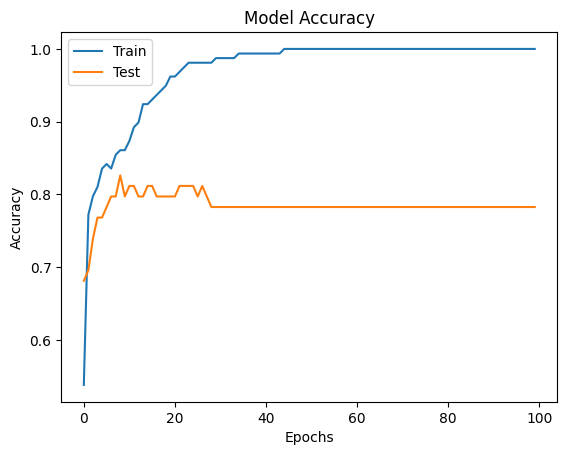

In [18]:
# Acuracy Plot
plt.plot(classifier_report.history['accuracy'])
plt.plot(classifier_report.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

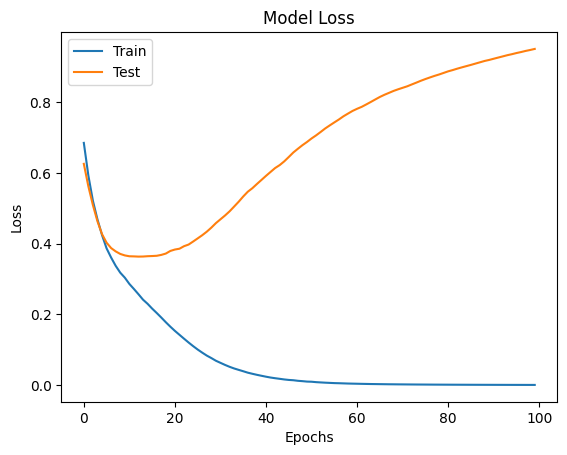

In [19]:
# summarize history for loss
plt.plot(classifier_report.history['loss'])
plt.plot(classifier_report.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()